In [5]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
import os

In [9]:
data = pd.read_csv(os.path.join(
    os.getcwd(), 
    "data", 
    "country_vaccinations.csv"))

In [12]:
print(f"Size of data is: {data.shape}")

Size of data is: (13307, 15)


In [13]:
print(f"Missing values in dataset: \n{data.isna().sum()}")

Missing values in dataset: 
country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5390
people_vaccinated                      6069
people_fully_vaccinated                8069
daily_vaccinations_raw                 6685
daily_vaccinations                      226
total_vaccinations_per_hundred         5390
people_vaccinated_per_hundred          6069
people_fully_vaccinated_per_hundred    8069
daily_vaccinations_per_million          226
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64


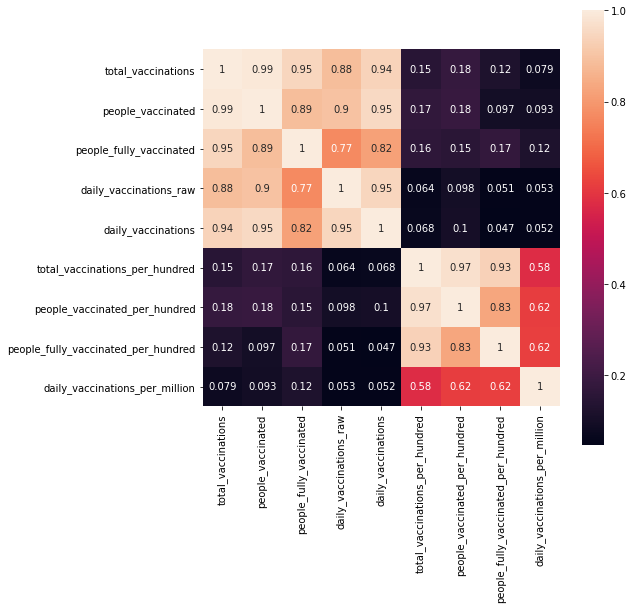

In [14]:
plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, square=True)
plt.show()